In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import plot_importance

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nhis-00002/nhis_00002.csv


In [2]:
ds = pd.read_csv("/kaggle/input/nhis-00002/nhis_00002.csv")
type(ds)

pandas.core.frame.DataFrame

In [3]:
ds_len = len(ds)
print(ds_len)
ds.head()

75101


,YEAR,SERIAL,STRATA,PSU,NHISHID,PERNUM,NHISPID,HHX,SAMPWEIGHT,LONGWEIGHT,...,HEARTATTEV,LEARNDEV,RETEV,DIABETICAGE,SPEDEV,AEFFORT,ASAD,AWORTHLESS,SATISFIED,SATSCORE
0,2020,1,150,25,0002020H000002,1,0002020H00000210,H000002,5946.002,17605.50,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN
1,2020,2,111,10,0002020H000003,1,0002020H00000310,H000003,6288.726,0.00,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN
2,2020,3,133,3,0002020H000004,1,0002020H00000410,H000004,6083.271,0.00,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN
3,2020,4,139,45,0002020H000007,1,0002020H00000710,H000007,11306.962,0.00,...,1,0,0,53,0,NaN,NaN,NaN,NaN,NaN
4,2020,5,130,21,0002020H000009,1,0002020H00000910,H000009,6471.818,19317.18,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Race')

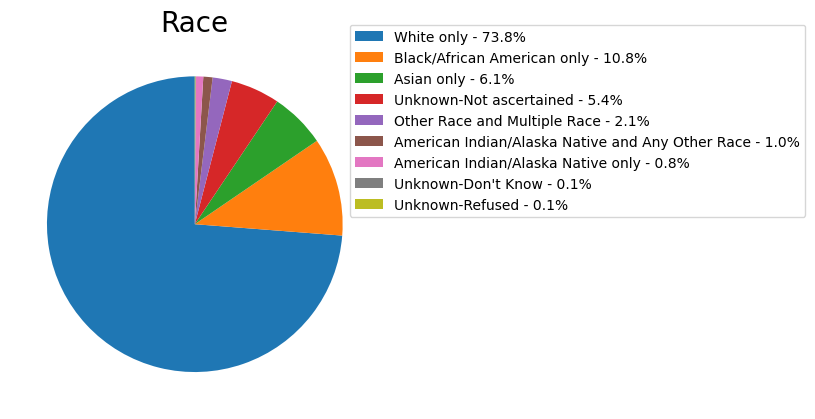

In [4]:
code_to_race = {
    100: 'White only',
    200: 'Black/African American only',
    300: 'American Indian/Alaska Native only',
    400: 'Asian only',
    510: 'Other Race and Multiple Race',
    542: 'American Indian/Alaska Native and Any Other Race',
    997: 'Unknown-Refused',
    998: 'Unknown-Not ascertained',
    999: "Unknown-Don't Know"
}

counts = ds['RACENEW'].value_counts()
labels = [code_to_race[code] for code in counts.index]

plt.pie(counts, startangle=90, autopct='')
plt.legend(loc="lower left", bbox_to_anchor=(0.9, 0.5), ncol=1, fontsize=10, 
           labels=['{} - {:.1f}%'.format(l, c/sum(counts)*100) for l, c in zip(labels, counts)])
plt.title("Race", size=20)